# Bank-Full Assignment

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the data set

In [3]:
bank = pd.read_csv("bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bank.shape

(45211, 17)

In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### In dataset null values are not present

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:>

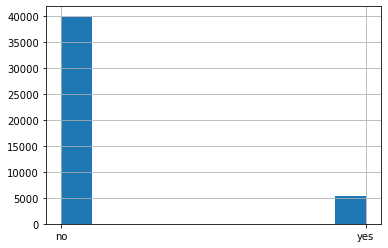

In [8]:
bank['Target'].hist()

In [9]:
bank.duplicated().sum()

0

## We will check correlation between features

In [10]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


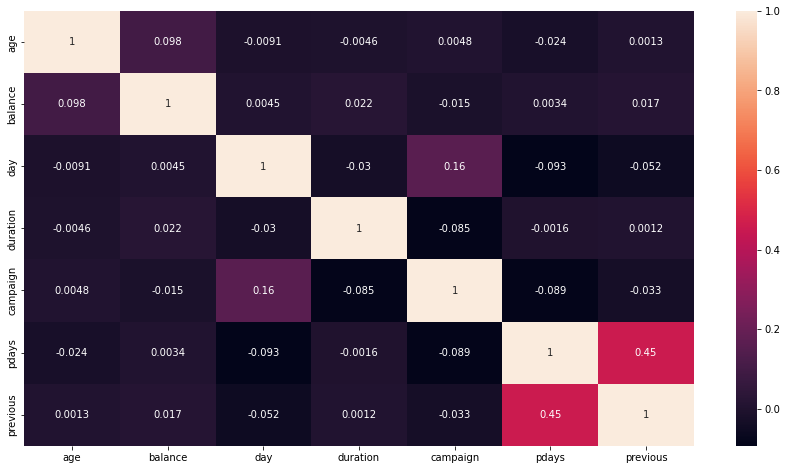

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(bank.corr(),annot=True)
plt.show()

### Mapping a data where only 2 outcomes are possible

In [12]:
data=bank
data['default']= data['default'].map({'yes' : 1, 'no' : 0})
data['housing']= data['housing'].map({'yes' : 1, 'no' : 0})
data['loan']= data['loan'].map({'yes' : 1, 'no' : 0})
data['Target']= data['Target'].map({'yes' : 1, 'no' : 0})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [13]:
# dropping the marital, day, month columns as they are not required
data.drop(["marital","day","month"],inplace=True,axis = 1)

In [14]:
data.shape

(45211, 14)

### Creating dummy variables and simultaneously removing one variable to avoid dummy variable trap

In [15]:
job = pd.get_dummies(data['job'],prefix='job',drop_first=True)
data = pd.concat([data,job],axis=1)

edu = pd.get_dummies(data['education'],prefix='education',drop_first=True)
data = pd.concat([data,edu],axis=1)

cont = pd.get_dummies(data['contact'],prefix='contact',drop_first=True)
data = pd.concat([data,cont],axis=1)

pout = pd.get_dummies(data['poutcome'],prefix='poutcome',drop_first=True)
data = pd.concat([data,pout],axis=1)

In [16]:
data.drop(['job','education','contact','poutcome'], 1,inplace=True)

C:\Users\Admin\AppData\Local\Temp/ipykernel_9800/2225600100.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['job','education','contact','poutcome'], 1,inplace=True)


In [17]:
data

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,1,...,0,0,0,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,1,...,0,0,1,0,0,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [18]:
data.shape

(45211, 29)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   duration             45211 non-null  int64
 6   campaign             45211 non-null  int64
 7   pdays                45211 non-null  int64
 8   previous             45211 non-null  int64
 9   Target               45211 non-null  int64
 10  job_blue-collar      45211 non-null  uint8
 11  job_entrepreneur     45211 non-null  uint8
 12  job_housemaid        45211 non-null  uint8
 13  job_management       45211 non-null  uint8
 14  job_retired          45211 non-null  uint8
 15  job_self-employed    45211 non-null  uint8
 16  job_services         4

## Outlier Detection

<AxesSubplot:>

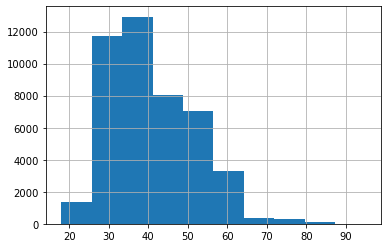

In [20]:
# histogram of Age
data['age'].hist()

<AxesSubplot:>

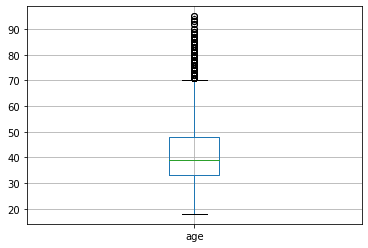

In [21]:
#Box plot
data.boxplot(column=['age'])

<AxesSubplot:>

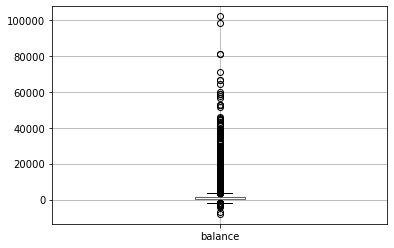

In [22]:
data.boxplot(column=['balance'])

<AxesSubplot:>

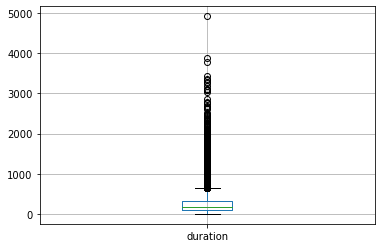

In [23]:
data.boxplot(column=['duration'])

<AxesSubplot:>

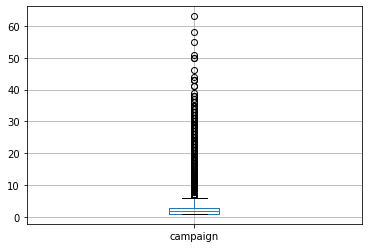

In [24]:
data.boxplot(column=['campaign'])

<AxesSubplot:>

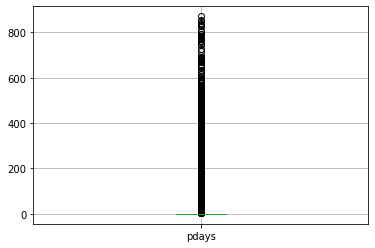

In [25]:
data.boxplot(column=['pdays'])

<AxesSubplot:>

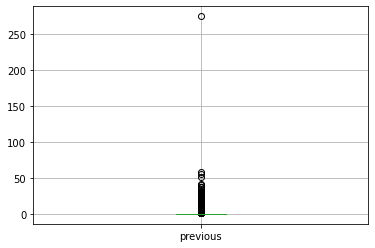

In [26]:
data.boxplot(column=['previous'])

## Removing outliers using Z-score

### In most of the cases, if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [27]:
from scipy import stats
z = np.abs(stats.zscore(data[['age','balance','duration','campaign','pdays','duration']]))
print(z)

            age   balance  duration  campaign     pdays  duration
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.011016
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.416127
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.707361
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.645231
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.233620
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  2.791329
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.768224
45208  2.925401  1.429593  3.373797  0.721811  1.436189  3.373797
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.970146
45210  0.370689  0.528364  0.399328  0.246560  1.476138  0.399328

[45211 rows x 6 columns]


In [28]:
threshold = 3
print(np.where(z>3))

(array([   34,    37,    37, ..., 45204, 45208, 45208], dtype=int64), array([1, 2, 5, ..., 0, 2, 5], dtype=int64))


In [29]:
data.shape # No. of rows and columns before removing outliers

(45211, 29)

In [30]:
df = data[(z < 3).all(axis=1)]

In [31]:
df.shape # No. of rows and columns after removing outliers

(40675, 29)

<AxesSubplot:>

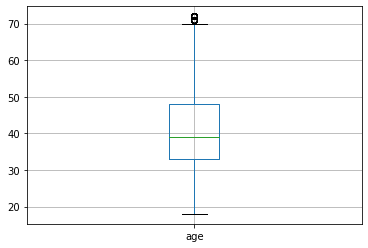

In [32]:
df.boxplot(column =['age'])

In [33]:
df.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,40675.000000,40675.000000,40675.000000,40675.000000,40675.000000,40675.000000,40675.00000,40675.000000,40675.000000,40675.000000,...,40675.000000,40675.000000,40675.000000,40675.000000,40675.000000,40675.000000,40675.000000,40675.000000,40675.000000,40675.000000
mean,40.657824,0.018660,1086.342471,0.552059,0.164622,235.819644,2.46697,27.030535,0.496890,0.102618,...,0.029453,0.006343,0.515993,0.293866,0.040443,0.058611,0.301659,0.032993,0.031272,0.848703
std,10.092279,0.135323,1723.075301,0.497289,0.370844,190.442779,1.95103,73.968306,2.226506,0.303463,...,0.169075,0.079391,0.499750,0.455537,0.196997,0.234898,0.458984,0.178621,0.174055,0.358342
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.00000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,67.000000,0.000000,0.000000,104.000000,1.00000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,432.000000,1.000000,0.000000,178.000000,2.00000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,1350.000000,1.000000,0.000000,306.000000,3.00000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,72.000000,1.000000,10483.000000,1.000000,1.000000,1030.000000,12.00000,340.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


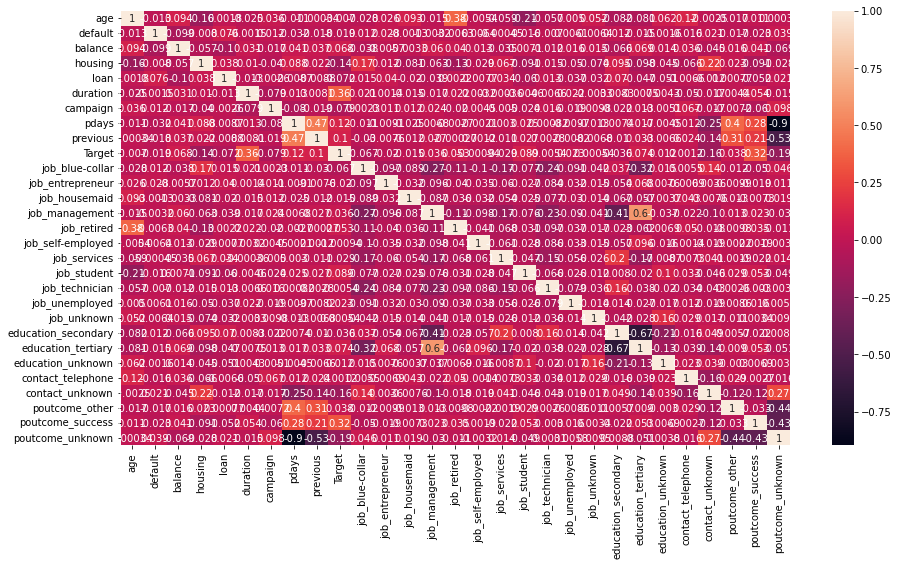

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
X = df.drop(['Target'],1)
y = df['Target']

C:\Users\Admin\AppData\Local\Temp/ipykernel_9800/2544279944.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop(['Target'],1)


In [36]:
y.value_counts()

0    36501
1     4174
Name: Target, dtype: int64

In [37]:
import statsmodels.api as sm

### Here we will use logit function and using summary, we will identified p value. If p value is greater than 0.05 then we will remove that variable

In [38]:
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.226580
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40675
Model:                          Logit   Df Residuals:                    40647
Method:                           MLE   Df Model:                           27
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.3151
Time:                        12:03:33   Log-Likelihood:                -9216.1
converged:                       True   LL-Null:                       -13455.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0229      0.002    -12.354      0.000      -0.027      -0.019
default                -0.0765      0.173     -0.441      0.659      -0.416       0.263
balance               4.66e-05   1.05e-05      4.457      0.000    2.61e-05    6.71e-05
housing                -0.9102      0.043    -21.117      0.000      -0.995      -0.826
loan                   -0.7012      0.065    -10.753      0.000      -0.829      -0.573
duration                0.0053   8.74e-05     61.018      0.000       0.005       0.006
campaign               -0.1693      0.013    -12.672      0.000      -0.195      -0.143
pdays                  -0.0060      0.000    -13.772      0.000      -0.007      -0.005
previous               -0.0022      0.010     -0.224      0.822      -0.021       0.017
job_blue-collar        -0.6833      0.073     -9.306      0.000      -0.827      -0.539
job_entrepreneur       -0.7938      0.136     -5.847      0.000      -1.060      -0.528
job_housemaid          -0.7528      0.142     -5.302      0.000      -1.031      -0.474
job_management         -0.4837      0.076     -6.396      0.000      -0.632      -0.335
job_retired             0.2542      0.106      2.389      0.017       0.046       0.463
job_self-employed      -0.7315      0.120     -6.102      0.000      -0.966      -0.497
job_services           -0.5340      0.088     -6.058      0.000      -0.707      -0.361
job_student             0.1429      0.107      1.333      0.183      -0.067       0.353
job_technician         -0.4964      0.070     -7.066      0.000      -0.634      -0.359
job_unemployed         -0.4962      0.115     -4.298      0.000      -0.722      -0.270
job_unknown            -0.7314      0.264     -2.767      0.006      -1.249      -0.213
education_secondary    -0.1585      0.062     -2.571      0.010      -0.279      -0.038
education_tertiary      0.1479      0.073      2.030      0.042       0.005       0.291
education_unknown       0.0312      0.110      0.283      0.777      -0.185       0.247
contact_telephone      -0.0147      0.085     -0.173      0.862      -0.181       0.152
contact_unknown        -1.2401      0.064    -19.436      0.000      -1.365      -1.115
poutcome_other         -0.0115      0.101     -0.114      0.909      -0.210       0.187
poutcome_success        1.9664      0.084     23.292      0.000       1.801       2.132
poutcome_unknown       -1.6792      0.087    -19.412      0.000      -1.849      -1.510
=======================================================================================
"""

In [39]:
X.drop(['default','previous','job_student','education_unknown','poutcome_other','contact_telephone'],1,inplace=True)

C:\Users\Admin\AppData\Local\Temp/ipykernel_9800/2789762318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X.drop(['default','previous','job_student','education_unknown','poutcome_other','contact_telephone'],1,inplace=True)


In [40]:
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.226608
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40675
Model:                          Logit   Df Residuals:                    40653
Method:                           MLE   Df Model:                           21
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.3150
Time:                        12:03:35   Log-Likelihood:                -9217.3
converged:                       True   LL-Null:                       -13455.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0231      0.002    -12.945      0.000      -0.027      -0.020
balance              4.769e-05   1.04e-05      4.586      0.000    2.73e-05    6.81e-05
housing                -0.9157      0.043    -21.365      0.000      -1.000      -0.832
loan                   -0.7086      0.065    -10.910      0.000      -0.836      -0.581
duration                0.0053   8.72e-05     61.189      0.000       0.005       0.006
campaign               -0.1688      0.013    -12.733      0.000      -0.195      -0.143
pdays                  -0.0059      0.000    -14.056      0.000      -0.007      -0.005
job_blue-collar        -0.7120      0.071    -10.087      0.000      -0.850      -0.574
job_entrepreneur       -0.8237      0.134     -6.143      0.000      -1.087      -0.561
job_housemaid          -0.7832      0.140     -5.583      0.000      -1.058      -0.508
job_management         -0.5140      0.072     -7.141      0.000      -0.655      -0.373
job_retired             0.2261      0.104      2.169      0.030       0.022       0.430
job_self-employed      -0.7619      0.118     -6.469      0.000      -0.993      -0.531
job_services           -0.5612      0.086     -6.545      0.000      -0.729      -0.393
job_technician         -0.5245      0.067     -7.847      0.000      -0.655      -0.393
job_unemployed         -0.5266      0.113     -4.644      0.000      -0.749      -0.304
job_unknown            -0.7509      0.261     -2.872      0.004      -1.263      -0.238
education_secondary    -0.1649      0.055     -3.010      0.003      -0.272      -0.058
education_tertiary      0.1451      0.066      2.202      0.028       0.016       0.274
contact_unknown        -1.2414      0.064    -19.536      0.000      -1.366      -1.117
poutcome_success        1.9798      0.079     24.914      0.000       1.824       2.136
poutcome_unknown       -1.6409      0.078    -21.129      0.000      -1.793      -1.489
=======================================================================================
"""

In [41]:
X

,age,balance,housing,loan,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,...,job_self-employed,job_services,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,contact_unknown,poutcome_success,poutcome_unknown
0,58,2143,1,0,261,1,-1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,44,29,1,0,151,1,-1,0,0,0,...,0,0,1,0,0,1,0,1,0,1
2,33,2,1,1,76,1,-1,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,47,1506,1,0,92,1,-1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,33,1,0,0,198,1,-1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,505,0,1,386,2,-1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45206,51,825,0,0,977,3,-1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
45207,71,1729,0,0,456,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45209,57,668,0,0,508,4,-1,1,0,0,...,0,0,0,0,0,1,0,0,0,1


## Here we will use Logistic Regression to check accuracy, precision of model

In [42]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [44]:
y_pred_df = pd.DataFrame({'actual': y,
                         'predicted': classifier.predict(X)})

In [45]:
y_pred_df.head(200)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
206,0,0
207,0,0
208,0,0
209,0,0


## Confusion Matrix for the model accuracy

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred) # Actual and predicted values are taken
print (confusion_matrix)

[[35744   757]
 [ 3142  1032]]


## Classification report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     36501
           1       0.58      0.25      0.35      4174

    accuracy                           0.90     40675
   macro avg       0.75      0.61      0.65     40675
weighted avg       0.88      0.90      0.89     40675



# ROC-AUC Curve

Text(0, 0.5, 'True Positive Rate')

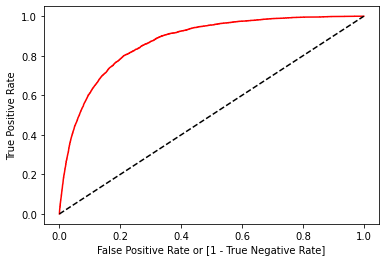

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [51]:
auc

0.6132528456171761

In [52]:
thresholds

array([1.98622503e+00, 9.86225032e-01, 9.80573863e-01, ...,
       3.08427822e-03, 3.07991967e-03, 2.72947703e-04])